
# Project: Investigate a Dataset (Movies Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> the project works on imdb movies data set
This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including movie name, cast, directors, user ratings, budget and revenue.

> The goal of the project is to get clean data set to answer the following two questions:

> Question 1: which genre has the highest count?

> Question 2: Which genres has hightest vote_average & revenue from year to year?

In [1]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df_movies = pd.read_csv("tmdb-movies.csv") #load data from movies csv file into a data frame

In [3]:
df_movies.head() #read the first 5 rows of the movies data frame

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df_movies.info() #display the data frame information like number of rows and columns, the data types, and number of non NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df_movies.tail() #read the last 5 five rows of the data set

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
df_movies['tagline'].value_counts() # count each value in the tagline column

Based on a true story.                                                                 5
Two Films. One Love.                                                                   3
Be careful what you wish for.                                                          3
Worlds Collide                                                                         2
Misery loves family.                                                                   2
                                                                                      ..
He will do anything to protect his family.                                             1
The truth is never overrated                                                           1
5. 4. 3. 2. 1......Time's Up.                                                          1
Meet Andy Sachs. A million girls would kill to have her job. She's not one of them.    1
Yesterday, Dr. Will Caster was only human...                                           1
Name: tagline, Length

In [7]:
df_movies['vote_average'].value_counts() # count each value in the vote average column

6.1    496
6.0    495
5.8    486
5.9    473
6.2    464
      ... 
8.9      1
8.6      1
9.2      1
8.7      1
2.0      1
Name: vote_average, Length: 72, dtype: int64

In [8]:
df_movies['original_title'].duplicated() # check the duplicated value in the original title column, 
# if not duplicated it'l show Flase value

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Name: original_title, Length: 10866, dtype: bool

### Data Cleaning

#### First of all make a copy of the dataframe to use in the cleaning step

In [9]:
df_movies_clean = df_movies.copy() # make another copy from the data set to work on it, to keep consistency 

#### change the data type of 'release_date' column to be date instead of being string

In [10]:
# define a function 'modify_release_date' that split the release data using / as a separator and ommit the last 2 digits
# then join the value in release year to the it.
def modify_release_date(row):
    release_date_entry = '/'.join(row['release_date'].split('/')[0:2]) + '/' + str(row['release_year'])
    return release_date_entry
df_movies_clean['release_date'] = df_movies_clean.apply(modify_release_date, axis=1)

df_movies_clean['release_date'] = pd.to_datetime(df_movies_clean['release_date']) #convert the column type from string into date

In [11]:
df_movies_clean.tail(25)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10841,42701,tt0062262,0.264925,75000,0,The Shooting,Will Hutchins|Millie Perkins|Jack Nicholson|Wa...,NaN,Monte Hellman,"Suspenseful desert pursuit in the ""High Noon"" ...",...,A hired gun seeks to enact revenge on a group ...,82,Western,Proteus Films,1966-10-23,12,5.5,1966,5.038511e+05,0.000000e+00
10842,36540,tt0061199,0.253437,0,0,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,NaN,Wolfgang Reitherman,NaN,...,Christopher Robin's bear attempts to raid a be...,25,Animation|Family,NaN,1966-01-01,12,7.9,1966,0.000000e+00,0.000000e+00
10843,29710,tt0060588,0.252399,0,0,Khartoum,Charlton Heston|Laurence Olivier|Richard Johns...,NaN,Basil Dearden|Eliot Elisofon,"Where the Nile divides, the great Cinerama adv...",...,"English General Charles George Gordon, a devou...",134,Adventure|Drama|War|History|Action,Julian Blaustein Productions Ltd.,1966-06-09,12,5.8,1966,0.000000e+00,0.000000e+00
10844,23728,tt0059557,0.236098,0,0,Our Man Flint,James Coburn|Lee J. Cobb|Gila Golan|Edward Mul...,NaN,Daniel Mann,The ORIGINAL man of mystery!,...,When scientists use eco-terrorism to impose th...,108,Adventure|Comedy|Fantasy|Science Fiction,20th Century Fox,1966-01-16,13,5.6,1966,0.000000e+00,0.000000e+00
10845,5065,tt0059014,0.230873,0,0,Carry On Cowboy,Sid James|Jim Dale|Angela Douglas|Kenneth Will...,NaN,Gerald Thomas,How the west was lost!,...,Stodge City is in the grip of the Rumpo Kid an...,93,Comedy|Western,Peter Rogers Productions,1966-03-01,15,5.9,1966,0.000000e+00,0.000000e+00
10846,17102,tt0059127,0.212716,0,0,Dracula: Prince of Darkness,Christopher Lee|Barbara Shelley|Andrew Keir|Fr...,NaN,Terence Fisher,"DEAD for Ten Years DRACULA, Prince of Darkness...",...,"Whilst vacationing in the Carpathian Mountain,...",90,Horror,Seven Arts Productions|Hammer Film Productions,1966-01-09,16,5.7,1966,0.000000e+00,0.000000e+00
10847,28763,tt0060548,0.034555,0,0,Island of Terror,Peter Cushing|Edward Judd|Carole Gray|Eddie By...,NaN,Terence Fisher,How could they stop the devouring death...that...,...,A small island community is overrun with creep...,89,Science Fiction|Horror,Planet Film Productions|Protelco,1966-06-20,13,5.3,1966,0.000000e+00,0.000000e+00
10848,2161,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,NaN,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,...,The science of miniaturization has been unlock...,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,1966-08-24,42,6.7,1966,3.436265e+07,8.061618e+07
10849,28270,tt0060445,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,NaN,Ronald Neame,Shirley MacLaine raises Michael Caine!,...,Harry Dean (Michael Caine) has a perfect plan ...,109,Action|Comedy|Crime,Universal Pictures,1966-12-16,14,6.1,1966,0.000000e+00,0.000000e+00
10850,26268,tt0060490,0.202473,0,0,Harper,Paul Newman|Lauren Bacall|Julie Harris|Arthur ...,NaN,Jack Smight,Harper takes a case - and the payoff is murder.,...,Harper is a cynical private eye in the best tr...,121,Action|Drama|Thriller|Crime|Mystery,Warner Bros.,1966-02-23,14,6.0,1966,0.000000e+00,0.000000e+00


In [12]:
df_movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

#### replace the zero values in some columns with the mean of the column

In [13]:
#replace all the zero values in the upcoming columns with the mean value of the coulmn
df_movies_clean['budget']=df_movies_clean['budget'].mask(df_movies_clean['budget']==0).fillna(df_movies_clean['budget'].mean())

In [14]:
df_movies_clean['budget_adj']=df_movies_clean['budget_adj'].mask(df_movies_clean['budget_adj']==0).fillna(df_movies_clean['budget_adj'].mean())

In [15]:
df_movies_clean['revenue']=df_movies_clean['revenue'].mask(df_movies_clean['revenue']==0).fillna(df_movies_clean['revenue'].mean())

In [16]:
df_movies_clean['revenue_adj']=df_movies_clean['revenue_adj'].mask(df_movies_clean['revenue_adj']==0).fillna(df_movies_clean['revenue_adj'].mean())

In [17]:
df_movies_clean['runtime']=df_movies_clean['runtime'].mask(df_movies_clean['revenue']==0).fillna(df_movies_clean['runtime'].mean())

In [18]:
df_movies_clean.head(25)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|

Drop columns that won't be helpful in analyzing the data set and has majority of zero values

In [19]:
df_movies_clean.drop(columns=['homepage', 'tagline', 'keywords', 'overview'], inplace=True) # remove unnecessary columns from the data frame
df_movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  float64       
 4   revenue               10866 non-null  float64       
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   director              10822 non-null  object        
 8   runtime               10866 non-null  int64         
 9   genres                10843 non-null  object        
 10  production_companies  9836 non-null   object        
 11  release_date          10866 non-null  datetime64[ns]
 12  vote_count            10866 non-null  int64         
 13  vote_average    

Drop rows with NaN values

In [20]:
# remove rows containing NULL values in the upcomig columns
df_movies_clean = df_movies_clean[df_movies_clean['imdb_id'].notna()]
df_movies_clean = df_movies_clean[df_movies_clean['director'].notna()]
df_movies_clean = df_movies_clean[df_movies_clean['genres'].notna()]
df_movies_clean = df_movies_clean[df_movies_clean['cast'].notna()]
df_movies_clean = df_movies_clean[df_movies_clean['production_companies'].notna()]
df_movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9771 non-null   int64         
 1   imdb_id               9771 non-null   object        
 2   popularity            9771 non-null   float64       
 3   budget                9771 non-null   float64       
 4   revenue               9771 non-null   float64       
 5   original_title        9771 non-null   object        
 6   cast                  9771 non-null   object        
 7   director              9771 non-null   object        
 8   runtime               9771 non-null   int64         
 9   genres                9771 non-null   object        
 10  production_companies  9771 non-null   object        
 11  release_date          9771 non-null   datetime64[ns]
 12  vote_count            9771 non-null   int64         
 13  vote_average     

In [21]:
# create a list with all movies' genres 
genre = ['Drama', 'Romance', 'Action', 'Horror', 'Comedy', 'Adventure', 'Mystery', 'Thriller', 'Science Fiction', 'Western', 
         'Fantasy', 'Crime','Family', 'Animation', 'War', 'History']

# create a for loop, iterating over the genres list
# then define a function that compare each elemnt in the genres list with the value in the genres column in the data set in the lower case
# if the 2 values are matched, the value from the list is returned and inserted in new column with the genre name
# if not, a NULL value is returned and inserted
for i in genre:
    def matcher(x):
        if i.lower() in x.lower():
            return i
        else:
             return np.nan
    df_movies_clean[i] = df_movies_clean['genres'].apply(matcher)
    
#change the format of the data frame from wide to long
# all the genres are combined in one column and if any movie has more than one genre, its data is repeated in other row with the other genre
df_movies_clean2 = pd.melt(df_movies_clean,
                           id_vars=['id','imdb_id','popularity','budget','revenue','original_title','cast','director','runtime',
                                   'production_companies','release_date','vote_count','vote_average','release_year','budget_adj','revenue_adj'],
                           value_vars=['Drama', 'Romance', 'Action', 'Horror', 'Comedy', 'Adventure', 'Mystery', 'Thriller',
                                       'Science Fiction', 'Western', 'Fantasy', 'Crime','Family', 'Animation', 'War', 'History'])
df_movies_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156336 entries, 0 to 156335
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    156336 non-null  int64         
 1   imdb_id               156336 non-null  object        
 2   popularity            156336 non-null  float64       
 3   budget                156336 non-null  float64       
 4   revenue               156336 non-null  float64       
 5   original_title        156336 non-null  object        
 6   cast                  156336 non-null  object        
 7   director              156336 non-null  object        
 8   runtime               156336 non-null  int64         
 9   production_companies  156336 non-null  object        
 10  release_date          156336 non-null  datetime64[ns]
 11  vote_count            156336 non-null  int64         
 12  vote_average          156336 non-null  float64       
 13 

In [22]:
# remove the variable name column as it's considered extra thing
df_movies_clean2.drop(columns=['variable'], inplace=True) # remove unnecessary columns from the data frame

df_movies_clean2.rename(columns={'value': 'genre'}, inplace=True) #rename the value column name into genre
df_movies_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156336 entries, 0 to 156335
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    156336 non-null  int64         
 1   imdb_id               156336 non-null  object        
 2   popularity            156336 non-null  float64       
 3   budget                156336 non-null  float64       
 4   revenue               156336 non-null  float64       
 5   original_title        156336 non-null  object        
 6   cast                  156336 non-null  object        
 7   director              156336 non-null  object        
 8   runtime               156336 non-null  int64         
 9   production_companies  156336 non-null  object        
 10  release_date          156336 non-null  datetime64[ns]
 11  vote_count            156336 non-null  int64         
 12  vote_average          156336 non-null  float64       
 13 

In [23]:
df_movies_clean2.head(25)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,NaN
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,NaN
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,NaN
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,NaN
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,NaN
5,281957,tt1663202,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08,Drama
6,87101,tt1340138,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,NaN
7,286217,tt3659388,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08,Drama
8,211672,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,NaN
9,150540,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08,NaN


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres has hightest counts

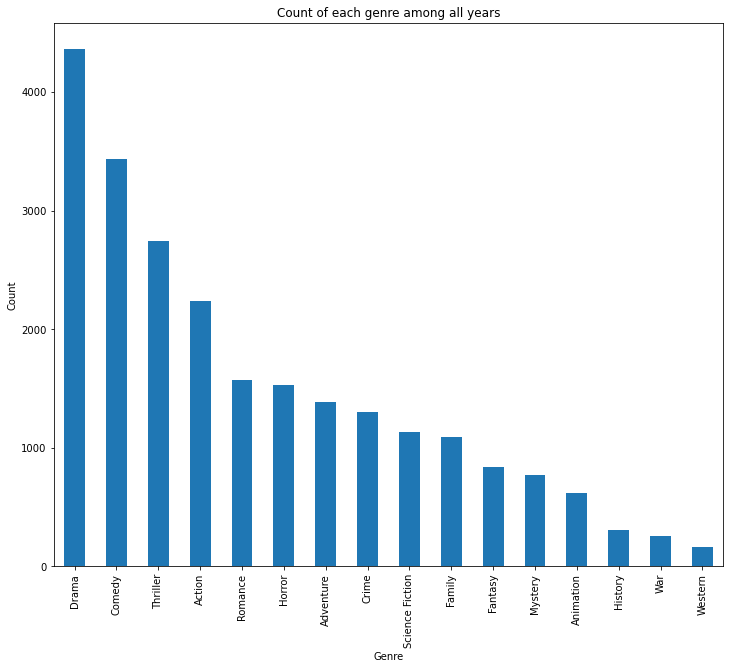

In [72]:
fig, ax = plt.subplots(figsize=(12,10)) #define handler for plotting and specifying the figure size by 12X10

#ploting a figure of count of each genres over years(1960-2015)
df_movies_clean2['genre'].value_counts().plot(ax=ax, kind="bar") 

ax.set_title('Count of each genre among all years') #setting the figure title

ax.set_xlabel('Genre') #setting x-axis label
ax.set_ylabel('Count') #setting y-axis label

plt.show()

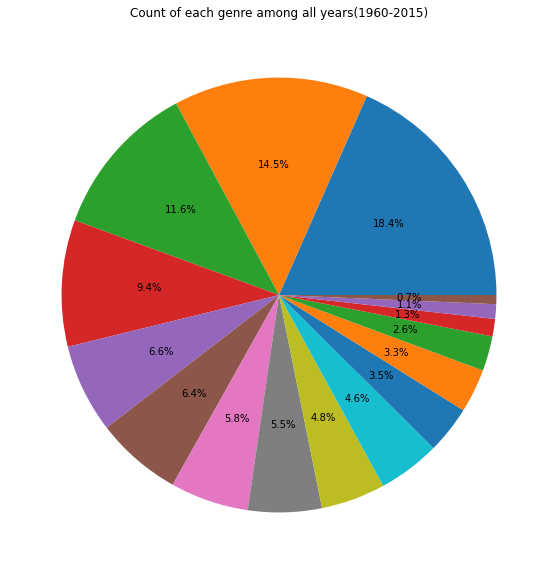

In [78]:
fig, ax = plt.subplots(figsize=(12,10)) #define handler for plotting and specifying the figure size by 12X10

#labels1= df_movies_clean2['genre'].values
#labels1 = list(dict.fromkeys(labels1))

values= df_movies_clean2['genre'].value_counts()
ax.pie(values, autopct = '%1.1f%%')
ax.set_title('Count of each genre among all years(1960-2015)')

plt.show()

The resulted figure shows that Drama movies has the highest count over the years (1960-2015), followed by the comedy movies then the thriiler ones.
And the least number goes to western movies then war ones.

### Research Question 2  (Which genres has hightest vote average & revenue from year to year)

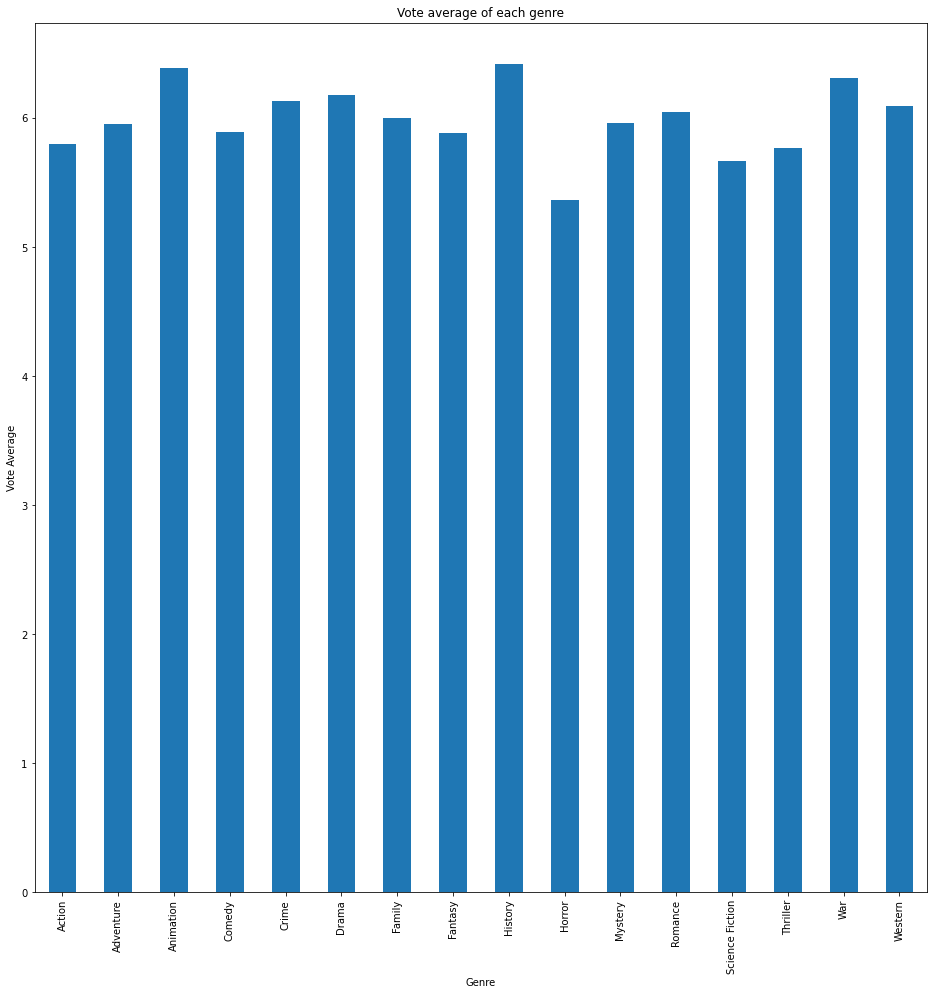

In [58]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
fig, ax = plt.subplots(figsize=(16,16)) #define handler for plotting and specifying the figure size by 16X16

#sns.countplot(data=df_movies_clean2,x='release_year',hue='genre');

#ploting a figure of each genres yearly revenues
# the data is groupped by release year and the genre
# the calculate the sum of all revenues of the groupped data
df_movies_clean2.groupby(['genre'])['vote_average'].mean().plot.bar(ax=ax) 

ax.set_title('Vote average of each genre') #setting the fiure title
ax.set_xlabel('Genre') #setting the x-axis label
ax.set_ylabel('Vote Average') #setting the y-axis label
plt.show()

The resulted figure shows that History movies has the highest vote average over all the years (1960-2015), followed by the animation movies then the Comedy ones.
And the least number goes to Horror movies.

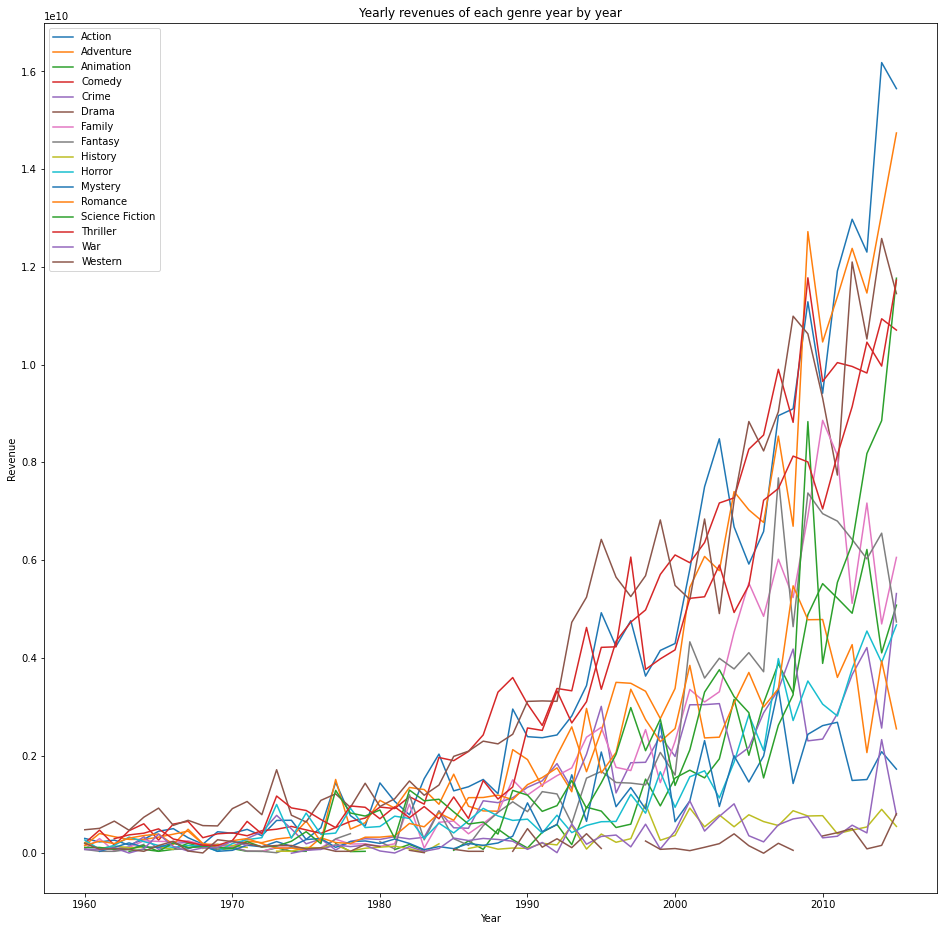

In [52]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
fig, ax = plt.subplots(figsize=(16,16)) #define handler for plotting and specifying the figure size by 16X16

#sns.countplot(data=df_movies_clean2,x='release_year',hue='genre');

#ploting a figure of each genres yearly revenues
# the data is groupped by release year and the genre
# the calculate the sum of all revenues of the groupped data
df_movies_clean2.groupby(['genre','release_year'])['revenue'].sum().unstack('genre').plot(ax=ax) 

ax.set_title('Yearly revenues of each genre year by year') #setting the fiure title
ax.set_xlabel('Year') #setting the x-axis label
ax.set_ylabel('Revenue') #setting the y-axis label
ax.legend(loc='upper left') #specifying the location of the figure legend
plt.show()

The visual shows that in 1960, Drama movies had the highest revenues, and through the years Drama and Comedy movies were always the winners, but after 2010, Action movies moved up and had the highest revenues.

##### <a id='conclusions'></a>
## Conclusions

>after assessing the movies data set and cleaning it and removing extra and unessassary data, we got the this final data frame.

>The first question results, shows that Drama movies has the highest count over the years (1960-2015), followed by the comedy movies then the thriiler ones. And the least number goes to western movies then war ones.


>The second question results, has 2 aspects:
first the vote average overall years : the visual shows that history and animation movies has the highest average votes among all years.

>The second part is the revenues: the visual shows that Drama movies has the highest revenues over the years (1960-2015), followed by the Action movies then the Comedy ones. And the least number goes to western movies then History ones.
But in yearly basis it shows that in 1960, Drama movies had the highest revenues, and through the years Drama and Comedy movies were always the winners, but after 2010, Action movies moved up and had the highest revenues.

## Limitations:
#### issues with the dataset:
>1- The result may be inaccurate as some rows has expected value instead of zero (as i replaced the zero value for budget and revenue with mean in each column)
>2- the repetitive data as most movies is classified to more than one genre.